In [124]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.legendre as leg

class Polynomials():
    def __init__(self, order):
        self.x = np.arange(0,1,.01)
        self.order = order
    def legendre_polynomial(self):
        coef = []
        if type(x) is float:
           # print("here")
            if x<0 or x>1:
                return 0
            else:
                for n in range(0, self.order+1):
                    if(n == self.order):
                        coef.append(1)
                    else:
                        coef.append(0)
                return (2.*sefl.order +1.)**.5*leg.Legendre(coef, domain=[-1,1])(2*x-1)
        else:
            y = np.zeros(x.size)
            #print(y.shape)
            for i in range(x.size):
               # print(i)
                if x[i] < 0 or x[i] > 1:
                    y[i] = 0
                else:
                    for n in range(0, self.order+1):
                        if(n == self.order):
                            coef.append(1)
                        else:
                            coef.append(0)
                    y[i]=(2.*self.order +1.)**.5*leg.Legendre(coef, domain=[-1,1])(2*x[i]-1)
                    coef.clear()
        return y
        

def gauss(x):
    return np.exp(-100*(x-.5)**2)

def legendre_polynomial(order, x):
    coef = []
    if type(x) is float:
       # print("here")
        if x<0 or x>1:
            return 0
        else:
            for n in range(0, order+1):
                if(n == order):
                    coef.append(1)
                else:
                    coef.append(0)
            return (2.*order +1.)**.5*leg.Legendre(coef, domain=[-1,1])(2*x-1)
    else:
        y = np.zeros(x.size)
        print(y.shape)
        for i in range(x.size):
           # print(i)
            if x[i] < 0 or x[i] > 1:
                y[i] = 0
            else:
                for n in range(0, order+1):
                    if(n == order):
                        coef.append(1)
                    else:
                        coef.append(0)
               # print(coef)
                #print(x[i])
                #print(y[i])
                y[i]=(2.*order +1.)**.5*leg.Legendre(coef, domain=[-1,1])(2*x[i]-1)
                coef.clear()
    return y

    

def scaling(order,scale, translation,x):
    return 2**(scale/2)*legendre_polynomial(order,2**scale*x-translation)


def scaling_coef(order,scale,translation,f):
    tmp = 0;
    w = weights(order)
    x = roots(order)
    print(type(x[0]))
    for q in range(0,w.size):
        tmp=tmp + w[q]*f(2**(-scale)*(x[q]+translation))*legendre_polynomial(order,float(x[q]))
        print(tmp)
    return 2**(-.5*scale)*tmp

def roots(order):
    coef=[]
    for n in range(0,order+1):
        if n == order:
            coef.append(1)
        else:
            coef.append(0)
    return .5*(leg.legroots(coef)+1)

def weights(order):
    return leg.leggauss(order)[1]

def testLegendre(f,order,x):
    y = np.zeros(x.size)
   # print(y)
    for i in range(y.size):
       # print(type(x[i]))
        y[i]= f(order,float(x[i]))
    return y


def seclegendre(x):
    return legendre_polynomial(3,x)

def func(scale,max_order,f,x):
    tmp = 0
    for j in range(1,max_order+1):
        for l in range(0,2**scale):
            tmp = tmp+scaling_coef(j,scale,l,f)*scaling(j,scale,l,x)
    return tmp

In [125]:
from scipy import optimize
root = optimize.brenth(seclegendre,0,.3)

In [129]:
func(3,3,gauss,x)

<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
0.0
(100,)
<class 'numpy.float64'>
-2.25638958217e-26
7.48003264149e-23
(100,)
<class 'numpy.float64'>
-6.55701474154e-22
3.57246147442e-19
(100,)
<class 'numpy.float64'>
-8.37197606898e-19
7.43810389665e-17
(100,)
<class 'numpy.float64'>
-4.69655638318e-17
6.47598160423e-16
(100,)
<class 'numpy.float64'>
-1.15760620709e-16
1.66032762281e-16
(100,)
<class 'numpy.float64'>
-1.25363727622e-17
-7.51318712085e-18
(100,)
<class 'numpy.float64'>
-5.96503081527e-20
-5.57160993078e-20
(100,)
<class 'numpy.float64'>
-1.24704817185e-23
-1.23350983435e-23
(100,)
<class 'numpy.float64'>
1.81784530875e-26
1.92464930072e-24
4.53692077466e-23
(100,)
<class 'numpy.float64'>
7.18947986128e-22
2.31960820846e-20
1.7588811438e-19
(100,)
<cla

array([  4.72229737e-23,   6.67781067e-23,   6.04600049e-23,
         3.56436582e-23,  -2.95943701e-25,  -3.99838110e-23,
        -7.60449539e-23,  -1.01104383e-22,  -1.07787107e-22,
        -8.87181385e-23,  -3.65224861e-23,   5.61748395e-23,
         1.96748828e-22,   3.51050335e-19,   3.12495652e-19,
         1.99481302e-19,   4.05987697e-20,  -1.35560460e-19,
        -3.00404900e-19,  -4.25343067e-19,  -4.81783474e-19,
        -4.41134635e-19,  -2.74805066e-19,   4.57967189e-20,
         5.49262206e-19,   7.10898229e-17,   7.14748554e-17,
         5.47719656e-17,   2.56456493e-17,  -9.97541500e-18,
        -4.61625487e-17,  -7.69870732e-17,  -9.65203101e-17,
        -9.88335806e-17,  -7.79982063e-17,  -2.80855086e-17,
         5.68331911e-17,   1.82686571e-16,   3.34199663e-16,
         5.89169060e-16,   5.53556720e-16,   3.11950806e-16,
        -5.10605166e-17,  -4.50889082e-16,  -8.02946726e-16,
        -1.02264528e-15,  -1.02539659e-15,  -7.26612478e-16,
        -4.17047845e-17,

In [127]:
weights(1)

array([ 2.])

In [128]:
x

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99])

In [87]:
weights(2)[0]

1.0

In [59]:
test = Polynomials(2)
x = np.arange(0,1,.01)

In [60]:
test.legendre_polynomial()

array([ 2.23606798,  2.10324554,  1.97310638,  1.84565051,  1.72087792,
        1.5987886 ,  1.47938257,  1.36265983,  1.24862036,  1.13726417,
        1.02859127,  0.92260165,  0.81929531,  0.71867225,  0.62073247,
        0.52547597,  0.43290276,  0.34301283,  0.25580618,  0.17128281,
        0.08944272,  0.01028591, -0.06618761, -0.13997786, -0.21108482,
       -0.2795085 , -0.3452489 , -0.40830601, -0.46867985, -0.5263704 ,
       -0.58137767, -0.63370166, -0.68334237, -0.7302998 , -0.77457395,
       -0.81616481, -0.85507239, -0.8912967 , -0.92483772, -0.95569545,
       -0.98386991, -1.00936109, -1.03216898, -1.05229359, -1.06973492,
       -1.08449297, -1.09656774, -1.10595922, -1.11266743, -1.11669235,
       -1.11803399, -1.11669235, -1.11266743, -1.10595922, -1.09656774,
       -1.08449297, -1.06973492, -1.05229359, -1.03216898, -1.00936109,
       -0.98386991, -0.95569545, -0.92483772, -0.8912967 , -0.85507239,
       -0.81616481, -0.77457395, -0.7302998 , -0.68334237, -0.63

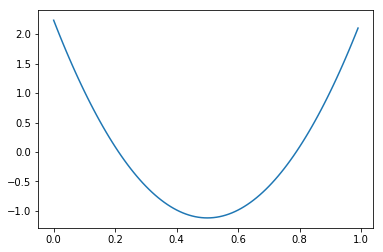

In [61]:
plt.plot(x, test.legendre_polynomial())
plt.show()

(100,)


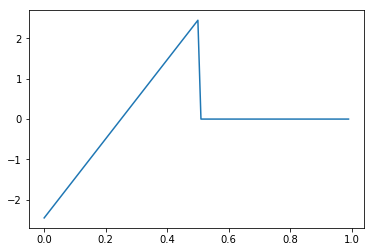

In [12]:
plt.plot(x,scaling(1,1,0,x))
plt.show()